In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C10_loan1.csv")
df

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes
5,No,Married,60,No
6,Yes,Divorced,220,No
7,No,Single,85,Yes
8,No,Married,75,No
9,No,Single,90,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [4]:
df.describe()

,Annual Income
count,10.000000
mean,104.000000
std,45.631373
min,60.000000
25%,77.500000
50%,92.500000
75%,115.000000
max,220.000000


In [5]:
df.columns

Index(['Home Owner', 'Marital Status', 'Annual Income', 'Defaulted Borrower'], dtype='object')

In [6]:
df['Defaulted Borrower'].value_counts()

No     7
Yes    3
Name: Defaulted Borrower, dtype: int64

In [7]:
g1={'Defaulted Borrower':{'No':1,'Yes':2}}
g2={'Home Owner':{'No':1,'Yes':2}}
g3={'Marital Status':{'Divorced':0,'Single':1,'Married':2}}
df=df.replace(g1)
df=df.replace(g2)
df=df.replace(g3)
print(df)

   Home Owner  Marital Status  Annual Income  Defaulted Borrower
0           2               1            125                   1
1           1               2            100                   1
2           1               1             70                   1
3           2               2            120                   1
4           1               0             95                   2
5           1               2             60                   1
6           2               0            220                   1
7           1               1             85                   2
8           1               2             75                   1
9           1               1             90                   2


In [8]:
x=df[['Home Owner','Annual Income','Defaulted Borrower']]
y=df['Marital Status']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [11]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [13]:
grid_search.best_score_

0.5833333333333333

In [14]:
rfc_best=grid_search.best_estimator_

[Text(2232.0, 1087.2, 'gini = 0.49\nsamples = 5\nvalue = [3, 4, 0]\nclass = Single')]

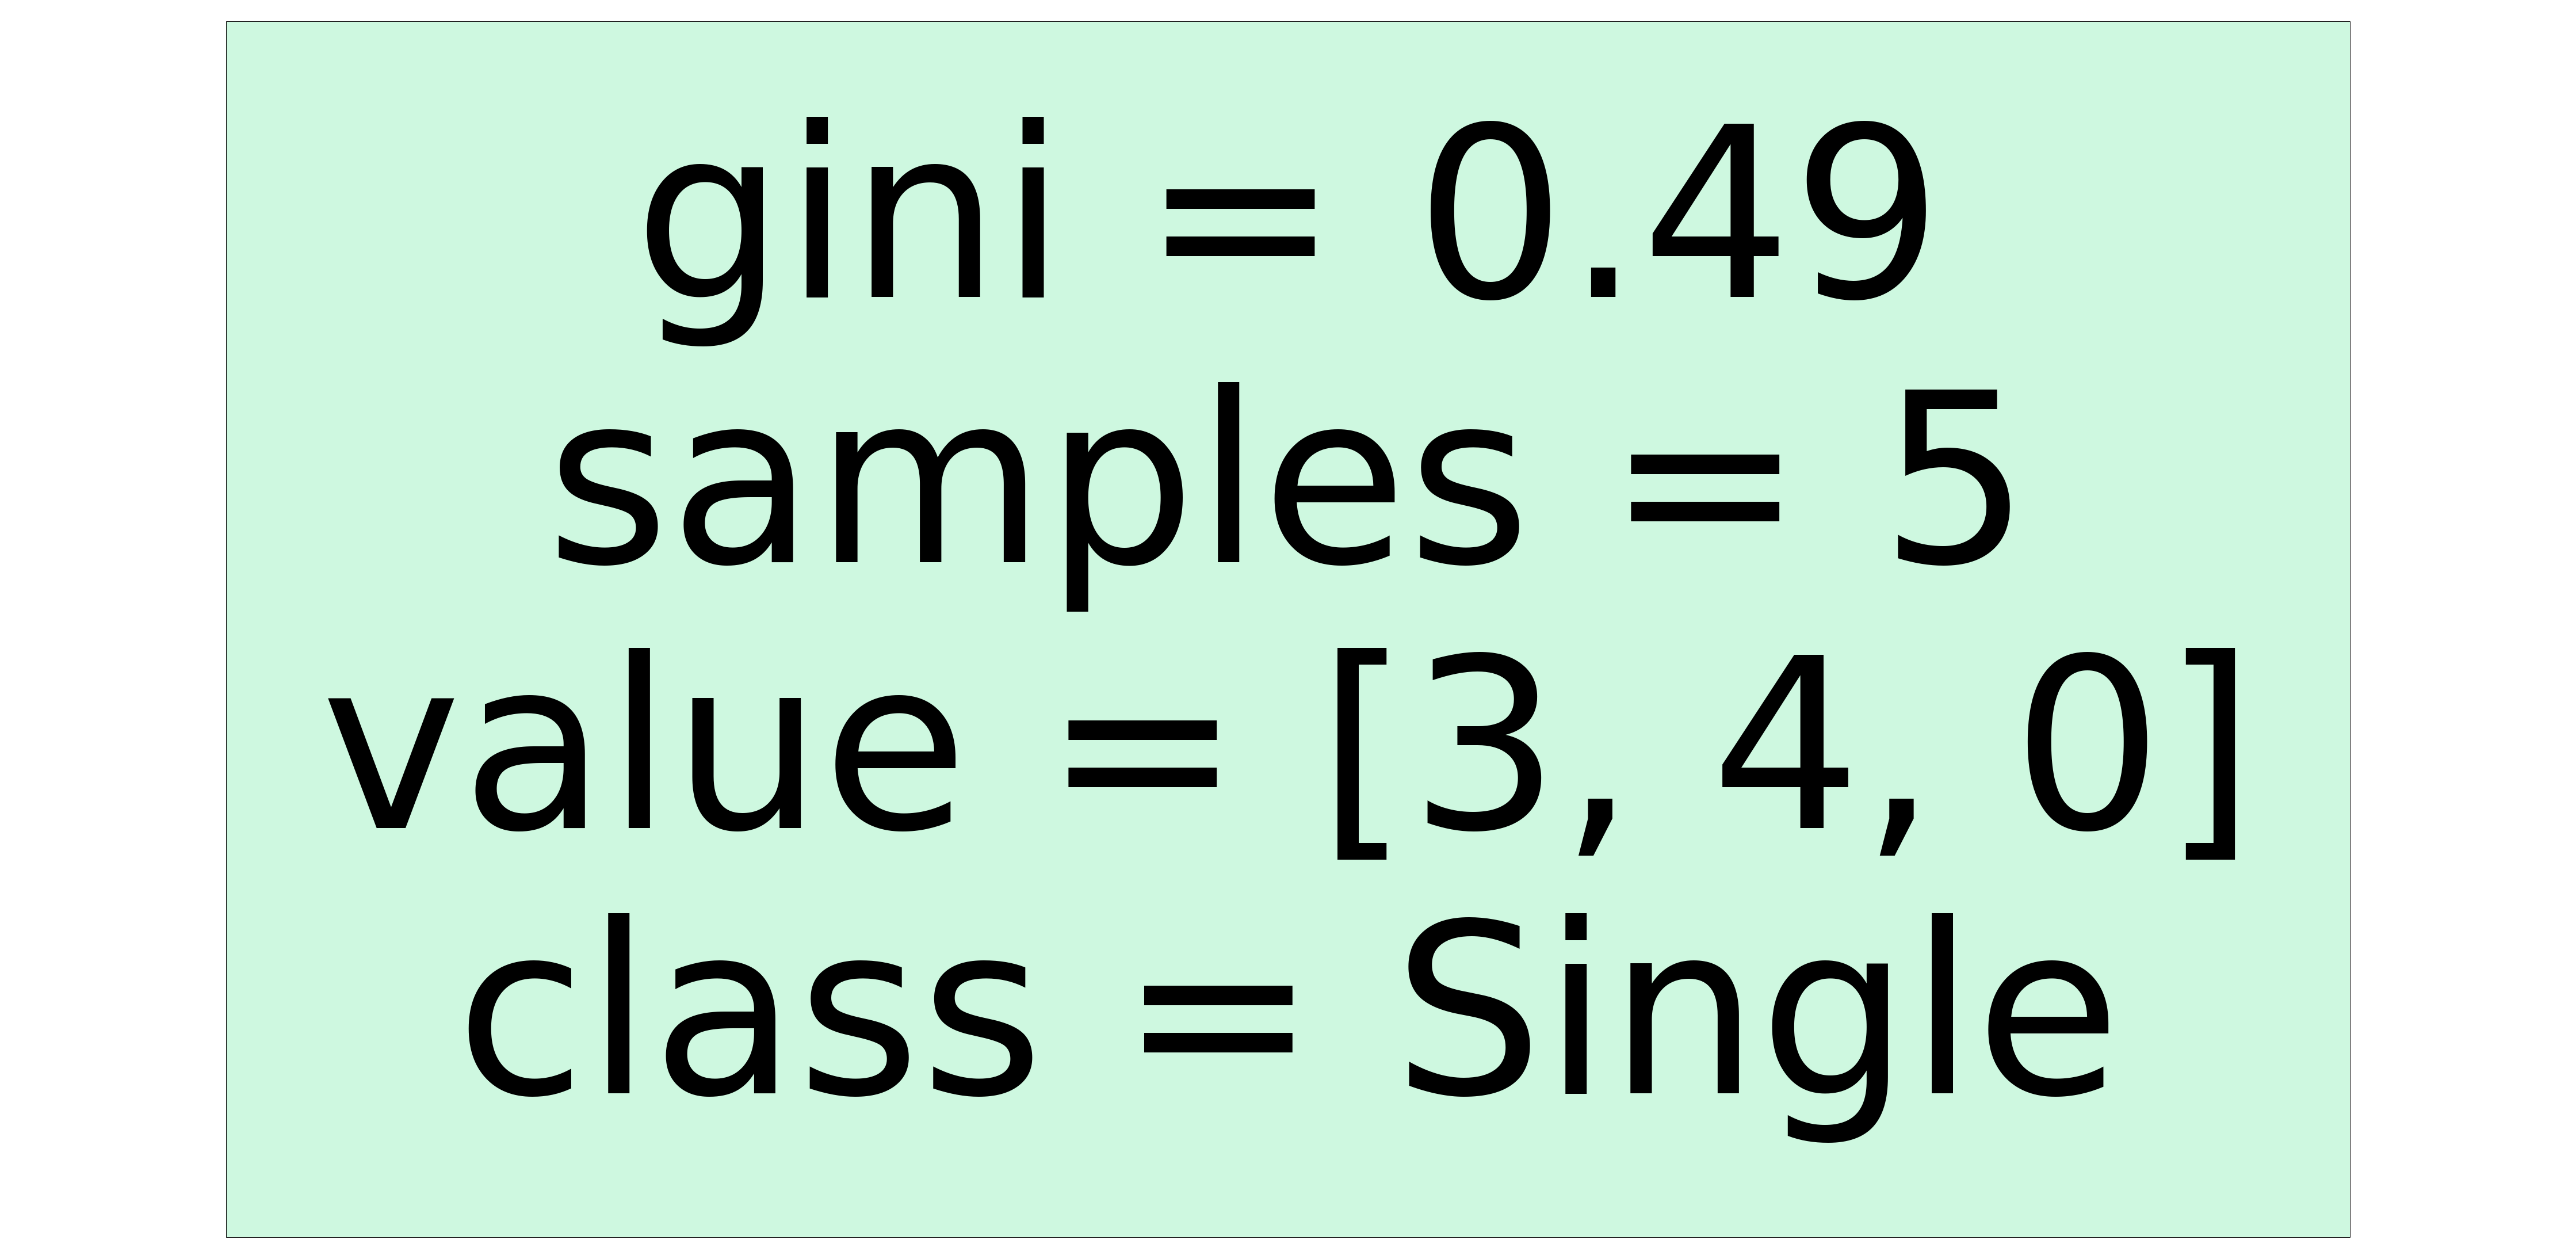

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Divorced','Single','Married'],filled=True)